# 📰 Fake News Detection using NLP and Machine Learning

This project classifies news articles as **Real (1)** or **Fake (0)** using Natural Language Processing and Machine Learning techniques.  
It's built with:
- Python 🐍  
- Scikit-learn  
- NLTK  
- Pandas  
- Streamlit for an interactive web interface 💻

### 🚀 Objectives:
- Clean and process the news dataset  
- Transform text into numerical features using **TF-IDF**  
- Train models like **Logistic Regression** and **Naive Bayes**  
- Evaluate using metrics like **Accuracy**, **F1-score**, and **Confusion Matrix**  
- Build a **Streamlit App** for real-time prediction  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import joblib
import warnings
warnings.filterwarnings("ignore")

nltk.download("stopwords")
nltk.download("wordnet")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:

# Skip initial comment lines and read the correct header
df = pd.read_csv("../data/news.csv", comment="#")

# Display first few rows
print(df.head())


                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  


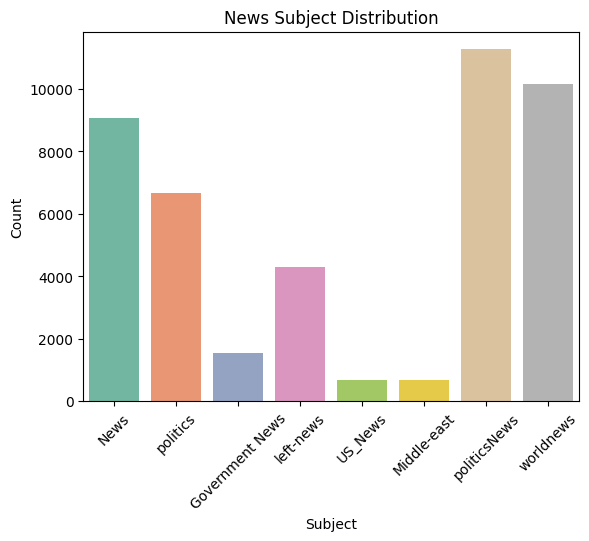

In [13]:
sns.countplot(x='subject', data=df, palette='Set2')
plt.title("News Subject Distribution")
plt.xlabel("Subject")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [21]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove links
    text = re.sub(r"[^a-zA-Z]", " ", text)  # remove numbers/symbols
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df["clean_text"] = df["text"].apply(clean_text)

# Drop rows with missing text or subject
df = df.dropna(subset=["clean_text", "subject"]).reset_index(drop=True)

df.head(2)


,title,text,subject,date,clean_text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",donald trump wish american happy new year leav...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",house intelligence committee chairman devin nu...


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize using TF-IDF (limit to 5000 most important features)
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["clean_text"]).toarray()

# Use 'subject' as the label column
y = df["subject"]

# Sanity check
print("Available columns:", df.columns)
print("Unique labels:", y.unique())  # Should show 'fake', 'real', etc.
print("Feature matrix shape:", X.shape)


Available columns: Index(['title', 'text', 'subject', 'date', 'clean_text'], dtype='object')
Unique labels: ['News' 'politics' 'Government News' 'left-news' 'US_News' 'Middle-east'
 'politicsNews' 'worldnews']
Feature matrix shape: (44345, 5000)


In [23]:
#Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("NaNs in y_train:", y_train.isna().sum())
print("NaNs in y_test:", y_test.isna().sum())


NaNs in y_train: 0
NaNs in y_test: 0


In [26]:
#Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score (weighted):", f1_score(y_test, y_pred_lr, average='weighted'))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7772014883301387
F1 Score (weighted): 0.7612772808668139
                 precision    recall  f1-score   support

Government News       0.30      0.08      0.12       311
    Middle-east       0.08      0.06      0.06       143
           News       0.96      0.98      0.97      1869
        US_News       0.12      0.11      0.11       138
      left-news       0.31      0.19      0.24       874
       politics       0.47      0.64      0.54      1301
   politicsNews       0.92      0.94      0.93      2264
      worldnews       0.92      0.96      0.94      1969

       accuracy                           0.78      8869
      macro avg       0.51      0.49      0.49      8869
   weighted avg       0.76      0.78      0.76      8869



In [28]:
#Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("F1 Score (weighted):", f1_score(y_test, y_pred_nb, average='weighted'))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.6956815875521479
F1 Score (weighted): 0.6569720690592562
                 precision    recall  f1-score   support

Government News       0.41      0.02      0.04       311
    Middle-east       0.12      0.03      0.05       143
           News       0.71      0.92      0.80      1869
        US_News       0.23      0.12      0.15       138
      left-news       0.37      0.16      0.23       874
       politics       0.42      0.39      0.40      1301
   politicsNews       0.76      0.84      0.80      2264
      worldnews       0.84      0.95      0.89      1969

       accuracy                           0.70      8869
      macro avg       0.48      0.43      0.42      8869
   weighted avg       0.65      0.70      0.66      8869



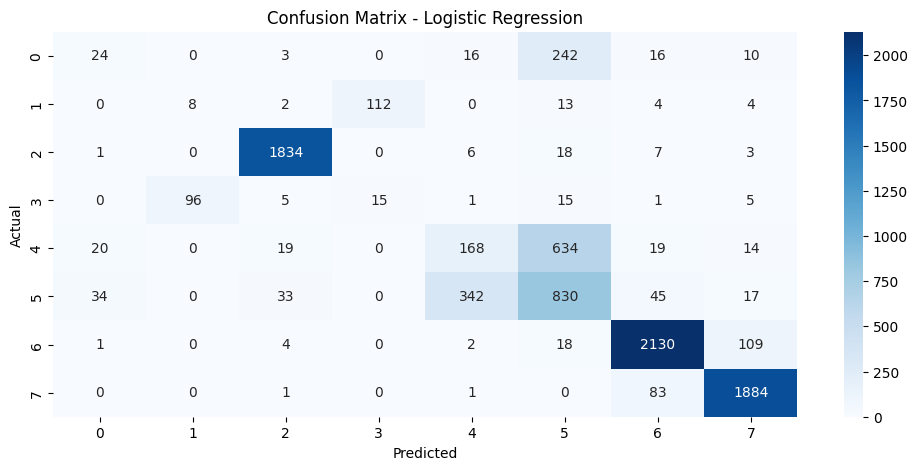

In [29]:
#Confusion Matrix (Heatmap)
plt.figure(figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [30]:
#Save Model and Vectorizer
joblib.dump(lr_model, "lr_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']